# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.


1. **Most common words** - find these and create word clouds


## Most Common Words

### Analysis

In [28]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [29]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean
data_clean.transcript

The Raven              once upon a midnight dreary  while i pondered...
Ozymandias                                      i met a traveller fr...
The Road Not Taken                              two roads diverged i...
Annabel Lee                                     it was many and many...
Invictus                                        out of the night tha...
                                            ...                        
Evening Star                                    twas noontide of sum...
A Late Walk                                     when i go up through...
Ae Fond Kiss                                    ae fond kiss  and th...
My Shadow                                       i have a little shad...
Maud Muller                                     maud muller  on a su...
Name: transcript, Length: 97, dtype: object

In [30]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text


In [31]:
# Combine it!
data_combined = combine_text(data_clean.transcript)
data_combined

' once upon a midnight dreary  while i pondered  weak and weary                           over many a quaint and curious volume of forgotten lore  while i nodded  nearly napping  suddenly there came a tapping  as of some one gently rapping  rapping at my chamber door    tis some visitor   i muttered   tapping at my chamber door only this  and nothing more     ah  distinctly i remember  it was in the bleak december                           and each separate dying ember wrought its ghost upon the floor  eagerly i wished the morrow  vainly i had sought to borrow from my books surcease of sorrow sorrow for the lost lenore  for the rare and radiant maiden whom the angels name lenore  nameless here for evermore    and the silken  sad  uncertain rustling of each purple curtain                          thrilled me  filled me with fantastic terrors  never felt before  so that now  to still the beating of my heart  i stood repeating     tis some visitor entreating entrance at my chamber door so

In [16]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [47]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=50, random_state=42)

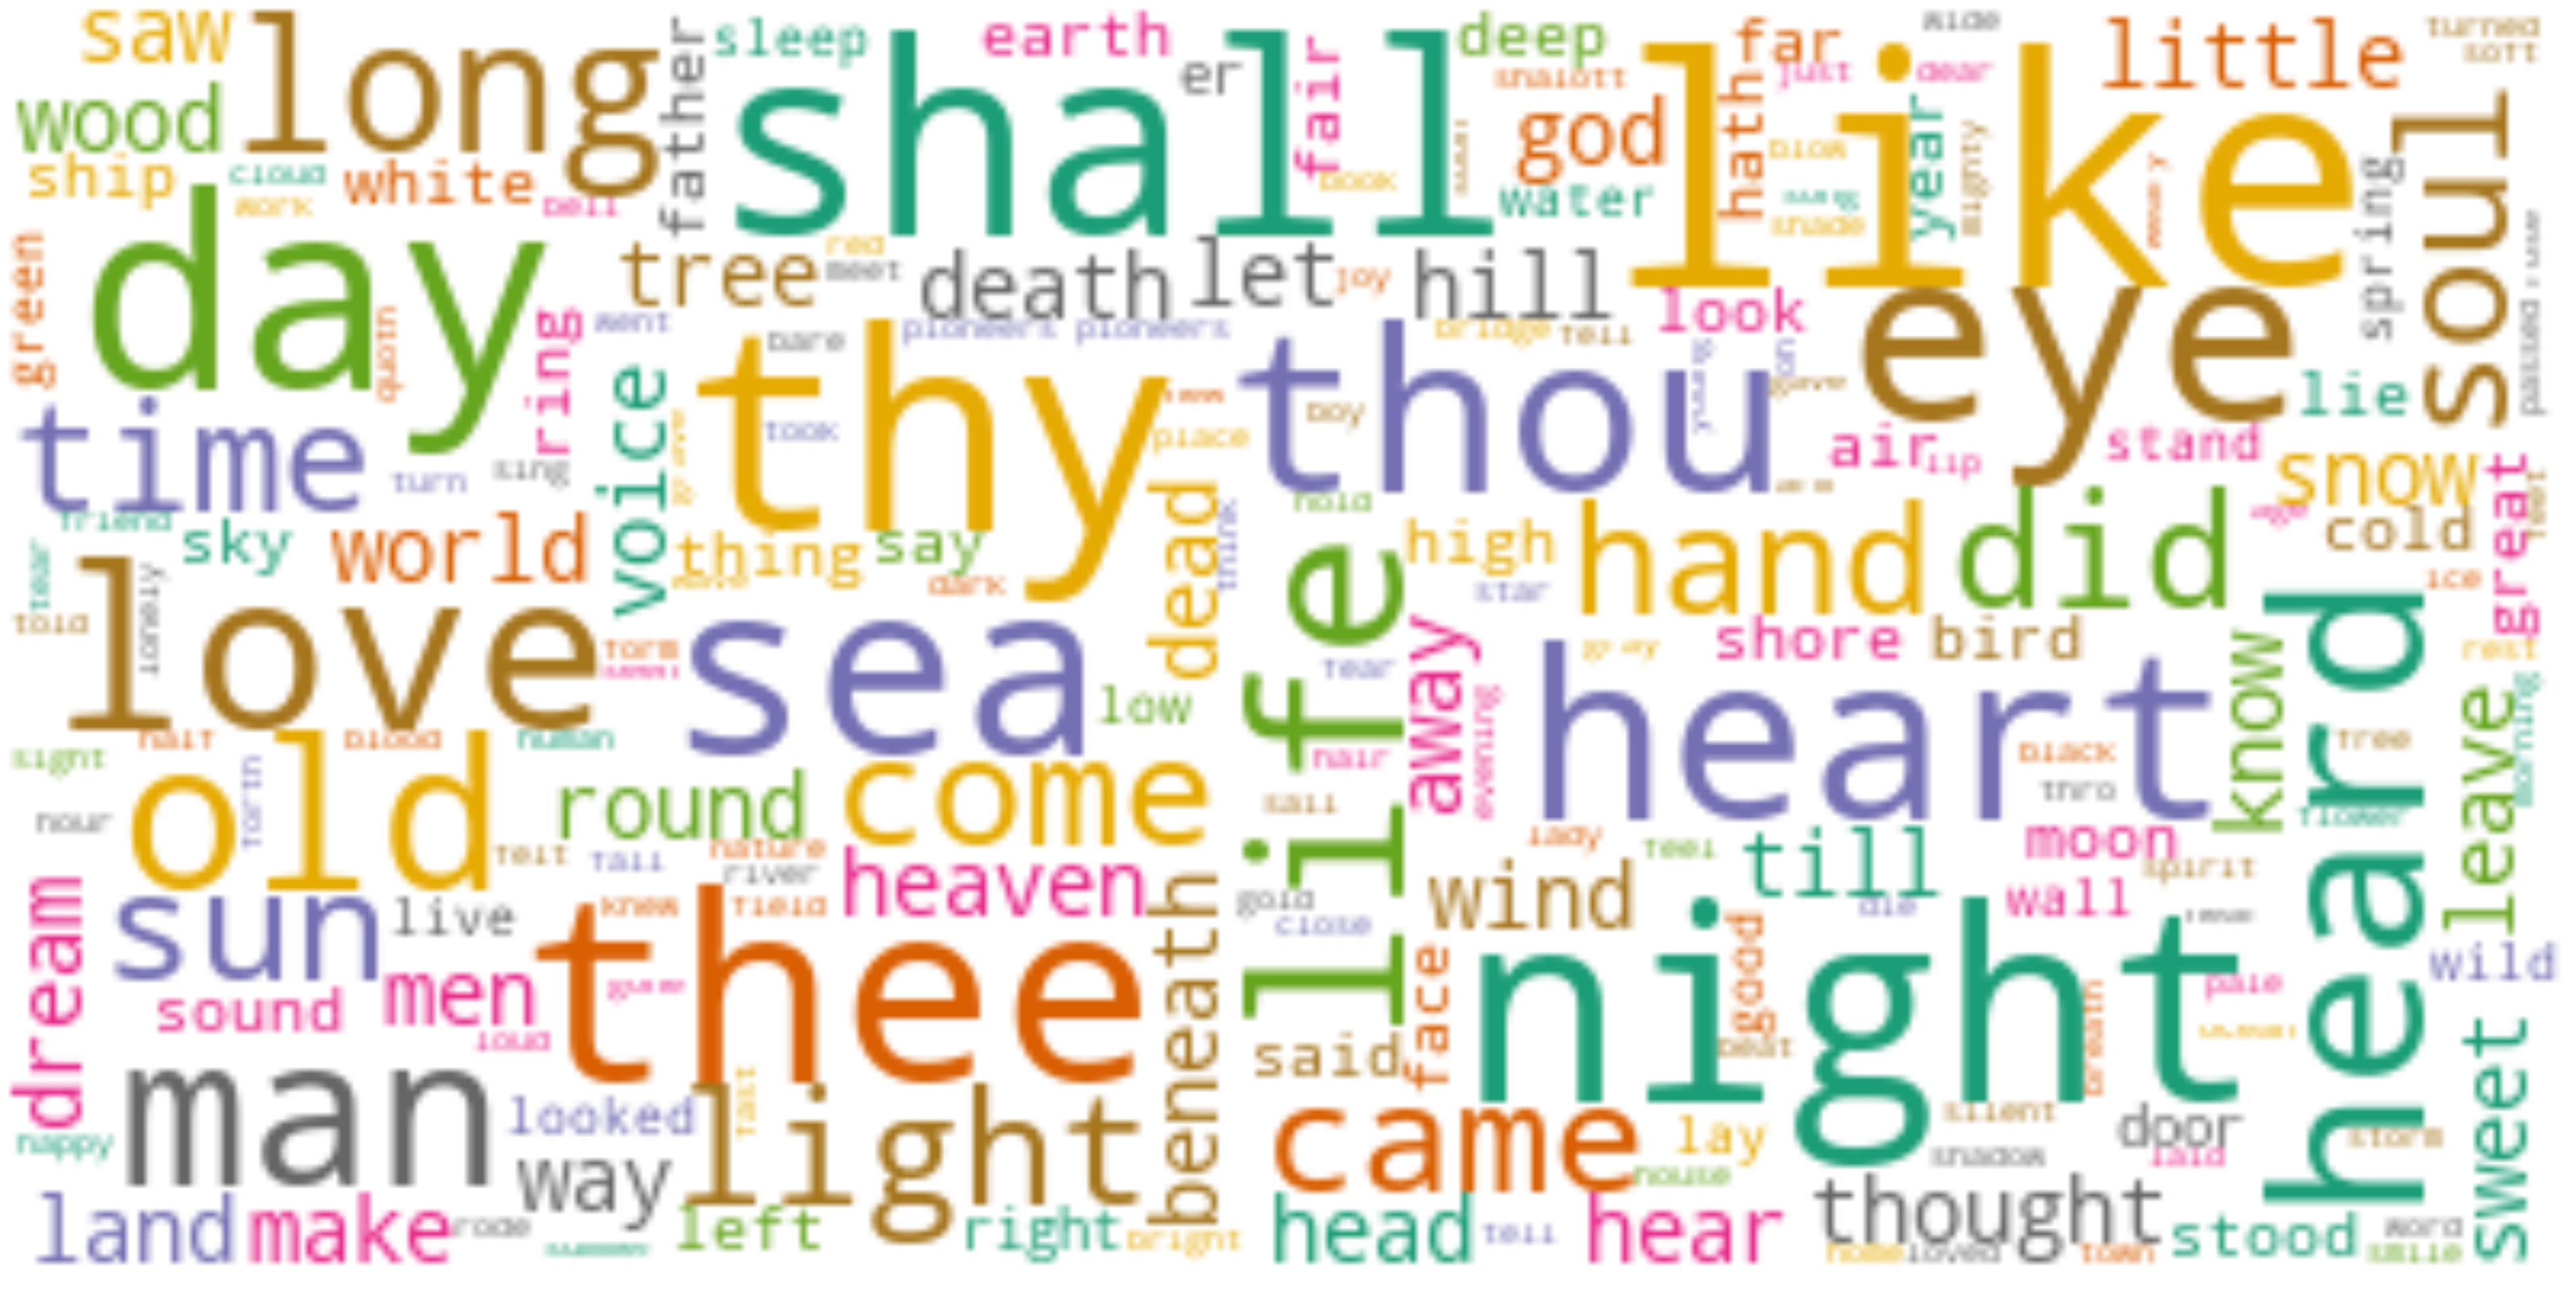

In [48]:
# Reset the output dimensions
import matplotlib.pyplot as plt
import re

plt.rcParams['figure.figsize'] = [70, 70]
    
text = re.sub('like', '', data_combined)
text = data_combined
wc.generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [1]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(authors, unique_list)), columns=['poet', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

NameError: name 'data' is not defined

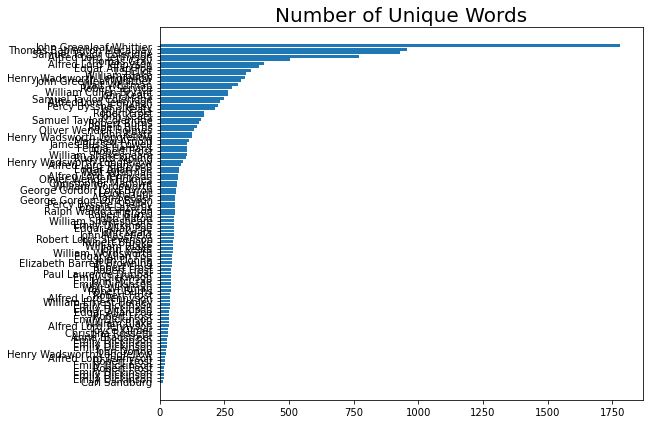

In [22]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

### Analysis

In [23]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 26),
 ('thee', 23),
 ('shall', 23),
 ('thy', 18),
 ('heart', 16),
 ('day', 15),
 ('love', 15),
 ('away', 14),
 ('heard', 13),
 ('sea', 13),
 ('make', 13),
 ('eyes', 13),
 ('thou', 13),
 ('world', 13),
 ('soul', 12),
 ('night', 12),
 ('little', 12),
 ('death', 12),
 ('long', 11),
 ('men', 10),
 ('man', 10),
 ('furrow', 10),
 ('sun', 10),
 ('light', 10),
 ('furthest', 9),
 ('hear', 9),
 ('sweet', 9),
 ('life', 9),
 ('head', 8),
 ('know', 8),
 ('furnace', 8),
 ('furrows', 8),
 ('round', 8),
 ('days', 8),
 ('old', 8),
 ('god', 8),
 ('came', 7),
 ('cold', 7),
 ('land', 7),
 ('way', 7),
 ('fair', 7),
 ('far', 7),
 ('gained', 7),
 ('dead', 7),
 ('think', 7),
 ('let', 7),
 ('oer', 7),
 ('beneath', 7),
 ('great', 7),
 ('futile', 7),
 ('future', 7),
 ('stood', 6),
 ('leaves', 6),
 ('green', 6),
 ('furld', 6),
 ('dream', 6),
 ('deep', 6),
 ('dark', 6),
 ('come', 6),
 ('did', 6),
 ('face', 6),
 ('silent', 6),
 ('joy', 6),
 ('free', 6),
 ('till', 6),
 ('furyand', 6),
 ('looked', 5),
 ('wi

### Findings

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.